In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [ ]:
# Visualize shape of digits
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


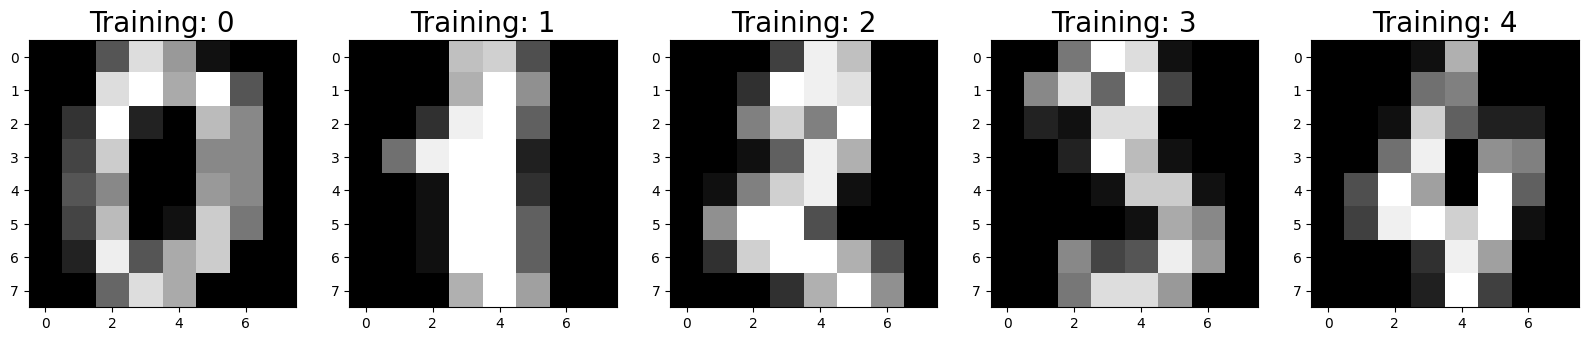

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i' % label, fontsize=20)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

In [ ]:
print(X_train.shape)

(1383, 64)


In [ ]:
print(y_train.shape)

(1383,)


In [ ]:
print(X_test.shape)

(414, 64)


In [ ]:
print(y_test.shape)

(414,)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticReg = LogisticRegression()
logisticReg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Return a NumPy Array
# Predict for One Observation (image)

print(logisticReg.predict(X_test[0].reshape(1,-1)))

[4]


In [ ]:
logisticReg.predict(X_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [ ]:
predictions = logisticReg.predict(X_test)

In [ ]:
score = logisticReg.score(X_test, y_test)
print(score)

0.9516908212560387


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Text(0.5, 1.0, 'Accuracy Score: 0.9516908212560387')

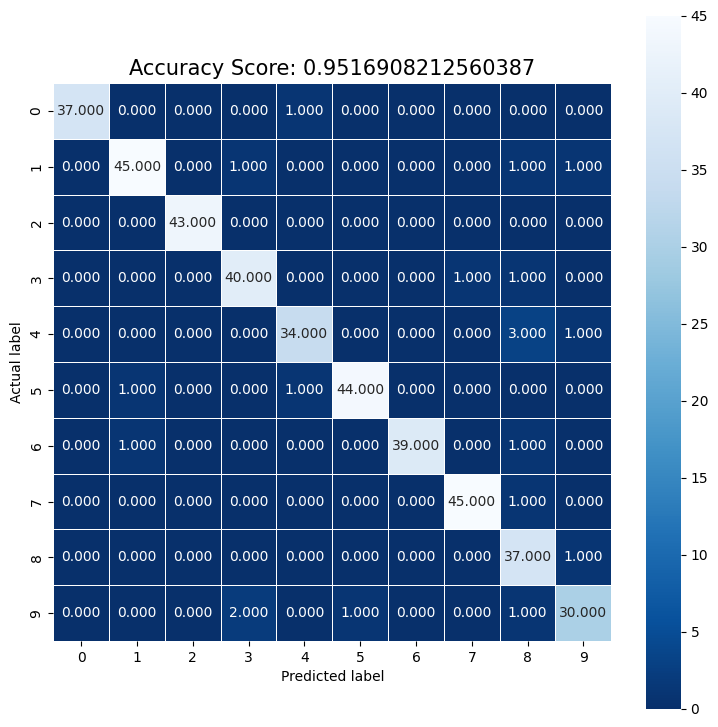

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidth=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

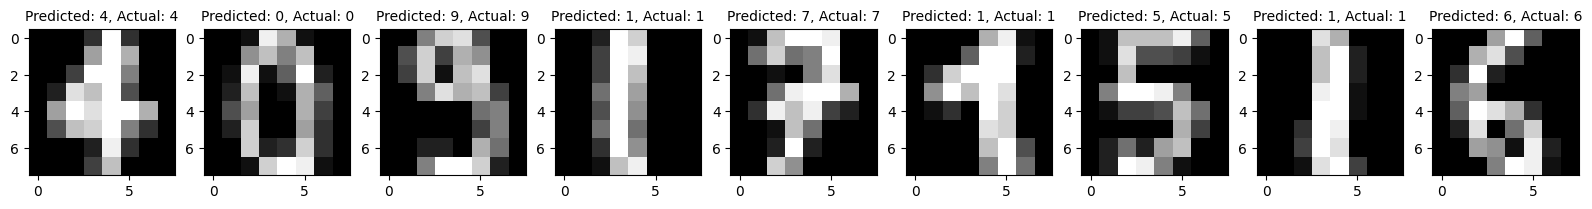

In [ ]:
index = 0
classifiedIndez = []
for predict, actual in zip(predictions, y_test):
  if predict == actual:
    classifiedIndez.append(index)
  index+=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(classifiedIndez[0:9]):
  plt.subplot(1,9, plotIndex +1)
  plt.imshow(np.reshape(X_test[wrong], (8,8)), cmap=plt.cm.gray)
  plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong]), fontsize=10)

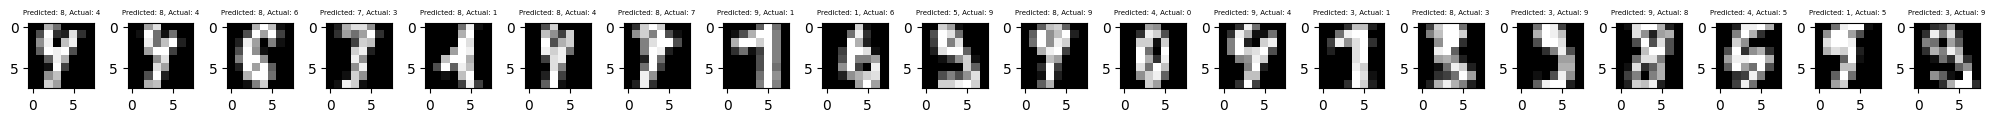

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

incorrectIndices = np.where(predictions != y_test)[0]

num_images = len(incorrectIndices)
num_images_per_row = 20
num_rows = (num_images - 1) // num_images_per_row + 1

plt.figure(figsize=(20, 3 * num_rows))

for plotIndex, wrong in enumerate(incorrectIndices):
    plt.subplot(num_rows, num_images_per_row, plotIndex + 1)
    plt.imshow(np.reshape(X_test[wrong], (8, 8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong]), fontsize=5)

plt.tight_layout()
plt.show()



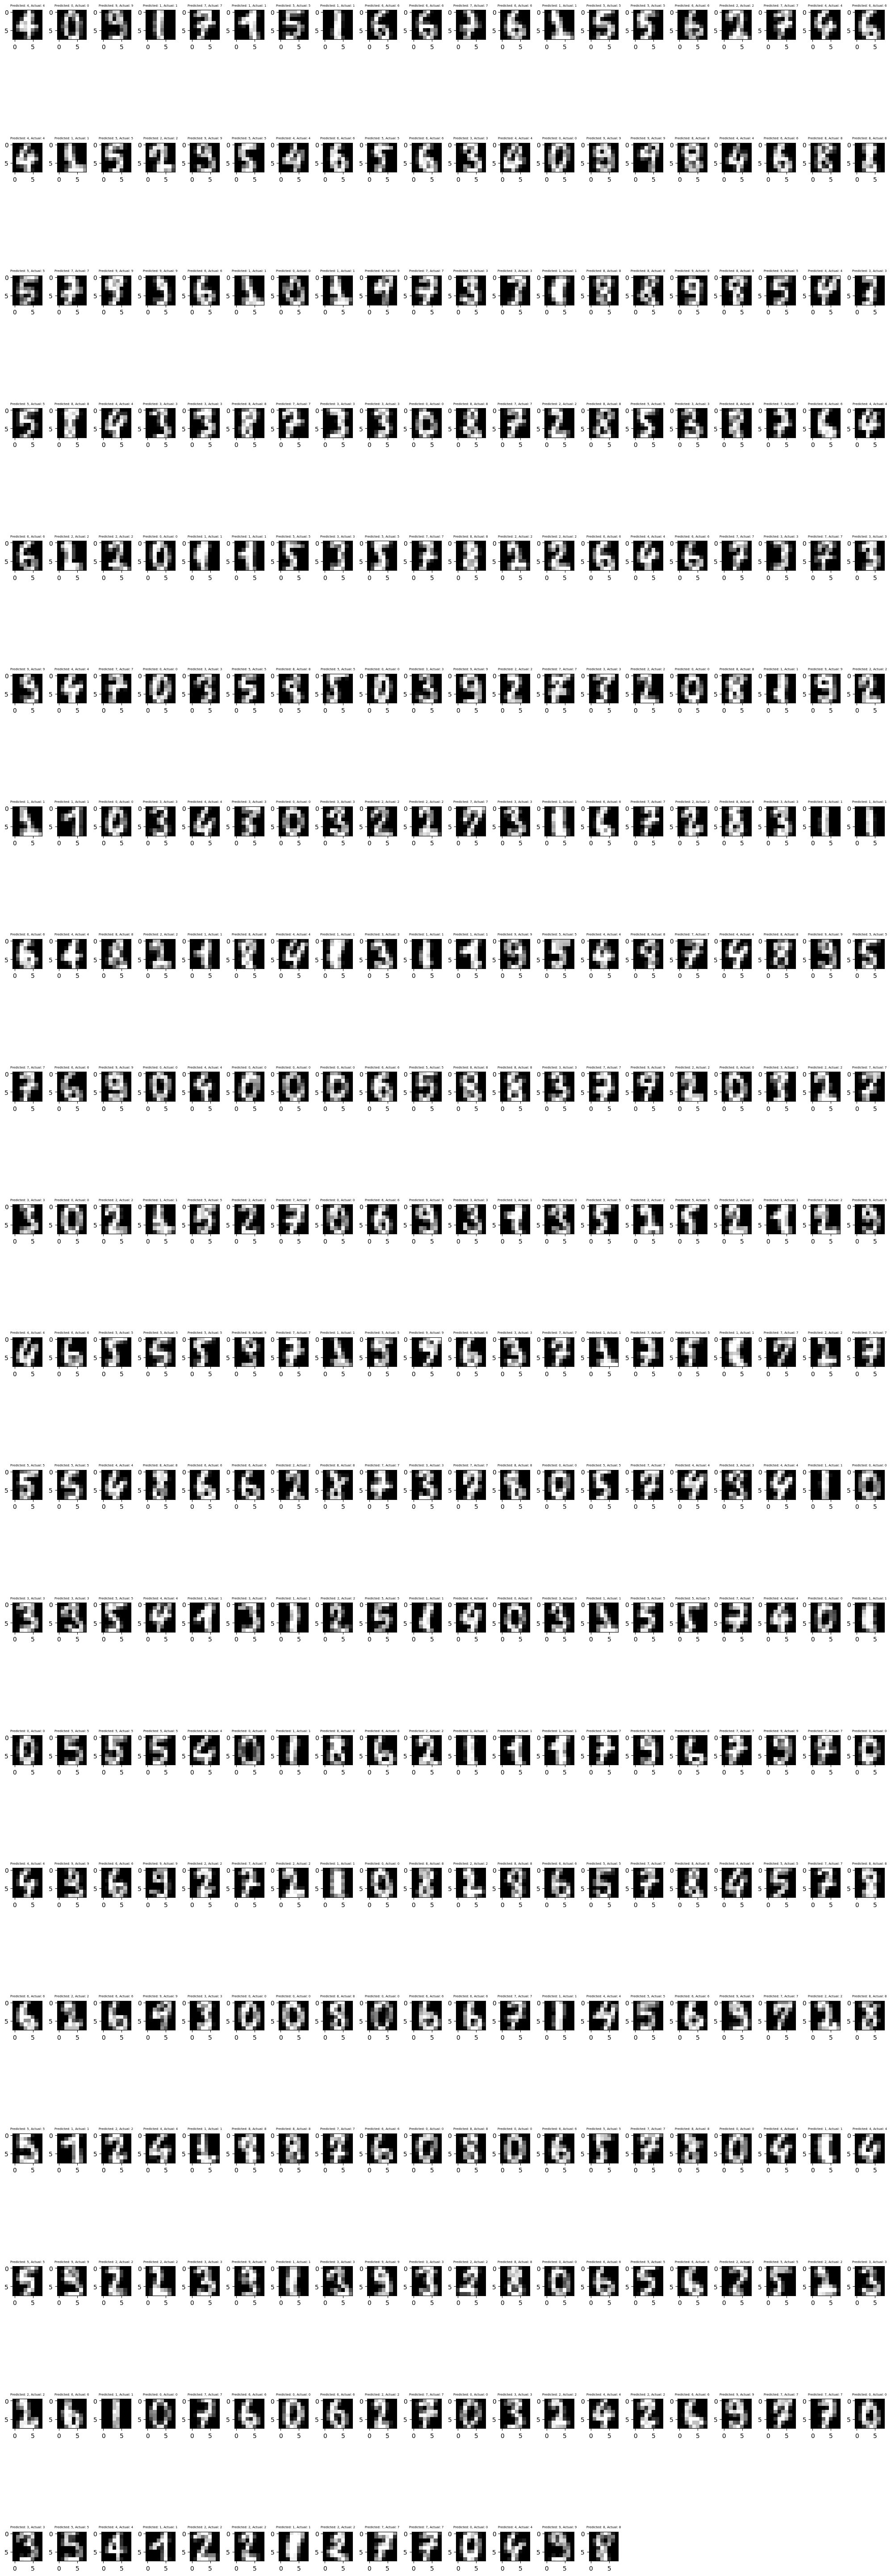

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

correctIndices = np.where(predictions == y_test)[0]

num_images = len(correctIndices)
num_images_per_row = 20
num_rows = (num_images - 1) // num_images_per_row + 1

plt.figure(figsize=(20, 3 * num_rows))

for plotIndex, correct in enumerate(correctIndices):
    plt.subplot(num_rows, num_images_per_row, plotIndex + 1)
    plt.imshow(np.reshape(X_test[correct], (8, 8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[correct], y_test[correct]), fontsize=5)

plt.tight_layout()
plt.show()


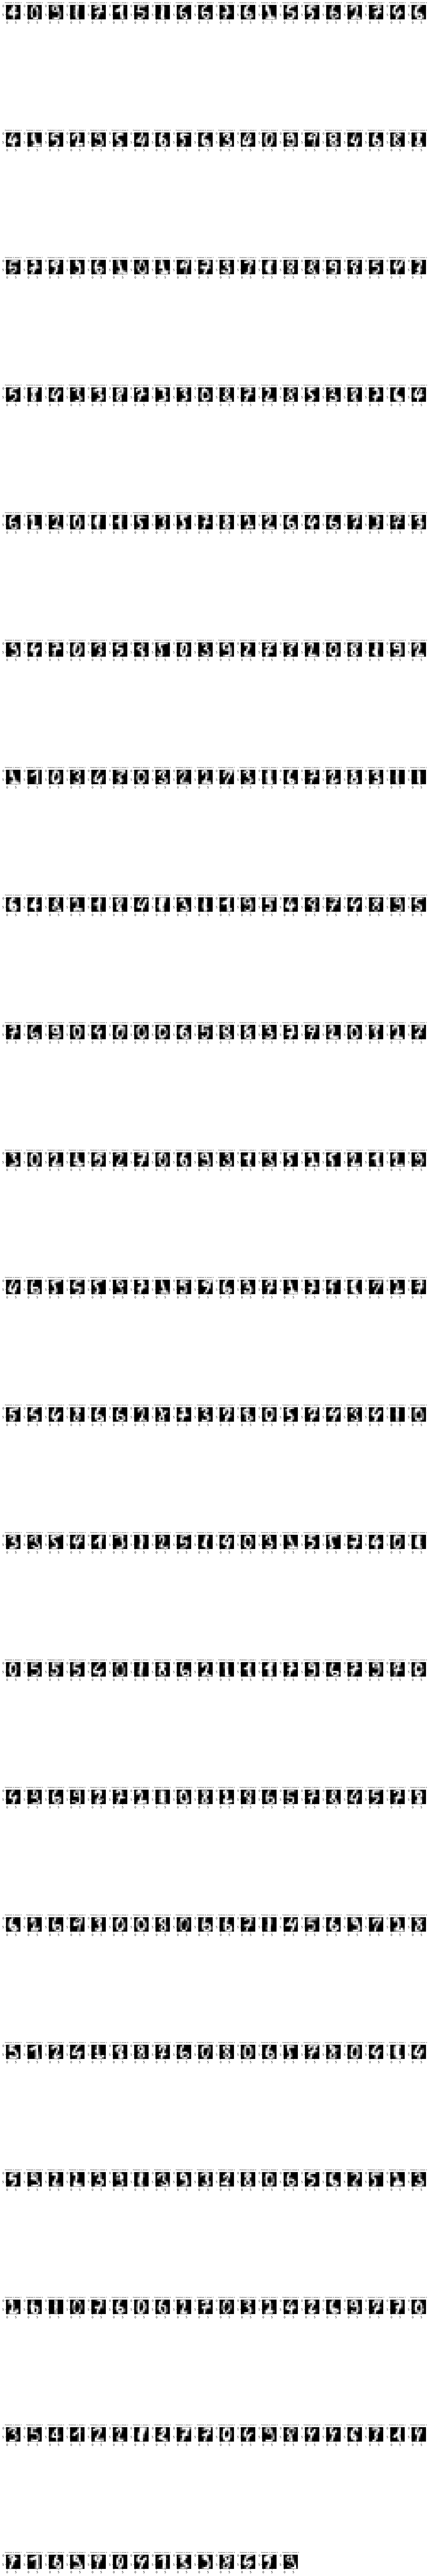

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

correctIndices = np.where(predictions == y_test)[0]
incorrectIndices = np.where(predictions != y_test)[0]

num_correct = len(correctIndices)
num_incorrect = len(incorrectIndices)

num_images_per_row = 20

num_rows_correct = (num_correct - 1) // num_images_per_row + 1
num_rows_incorrect = (num_incorrect - 1) // num_images_per_row + 1

total_rows = num_rows_correct + num_rows_incorrect

plt.figure(figsize=(20, 6 * total_rows))

# Display correct predictions
for plotIndex, correct in enumerate(correctIndices):
    row = plotIndex // num_images_per_row
    col = plotIndex % num_images_per_row
    plt.subplot(total_rows, num_images_per_row, col + 1 + row * num_images_per_row)
    plt.imshow(np.reshape(X_test[correct], (8, 8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[correct], y_test[correct]), fontsize=5)

# Display incorrect predictions
for plotIndex, wrong in enumerate(incorrectIndices):
    row = plotIndex // num_images_per_row
    col = plotIndex % num_images_per_row
    plt.subplot(total_rows, num_images_per_row, num_correct + col + 1 + row * num_images_per_row)
    plt.imshow(np.reshape(X_test[wrong], (8, 8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong]), fontsize=5)

plt.tight_layout()
plt.show()
